## Regression Task

In [238]:
import sklearn.datasets as load
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from timeit import default_timer as timer

dataset = load.load_svmlight_file('abalone_scale.txt', n_features = 8)

In [245]:
# First iterate over an array of sizes in this case w
start = 10
size_and_error = dict()
size_and_time = dict()

weights = np.array([]).reshape(-1, 8)

for N in np.arange(start, dataset[0].shape[0], 10).tolist():
    X = dataset[0][:N]
    y = dataset[1][:N]
    start = timer()
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    end = timer() - start
    size_and_error[N] = mean_squared_error(y_pred, y)
    size_and_time[N] = end
    weights = np.vstack((weights, reg.coef_))

In [246]:
x = list(size_and_error.keys())
y = [size_and_error[i] for i in x]
z = [size_and_time[i] for i in x]

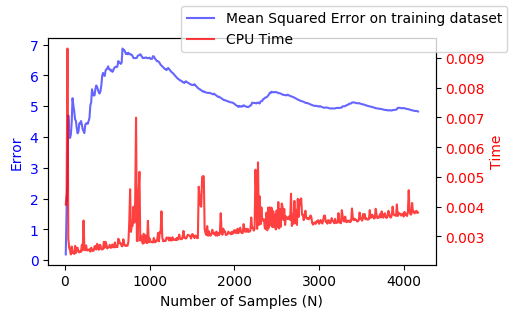

In [247]:
fig, ax1 = plt.subplots(figsize=(5,3), dpi=100)
color = 'blue'
ax1.set_xlabel('Number of Samples (N)')
ax1.set_ylabel('Error', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(x, y, color=color, alpha=0.6)
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Time', color=color)
ax2.plot(x, z, color=color, alpha=0.75)
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(['Mean Squared Error on training dataset','CPU Time'])


In [217]:
w0 = weights[:,0]
w1 = weights[:,1]
w2 = weights[:,2]
w3 = weights[:,3]
w4 = weights[:,4]
w5 = weights[:,5]
w6 = weights[:,6]
w7 = weights[:,7]

<StemContainer object of 3 artists>

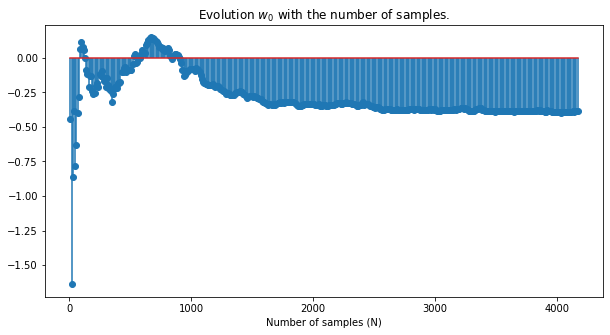

In [213]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Number of samples (N)')
ax.set_title('Evolution $w_0$ with the number of samples.')
ax.stem(list(size_and_error.keys()), w0, use_line_collection=True)

<StemContainer object of 3 artists>

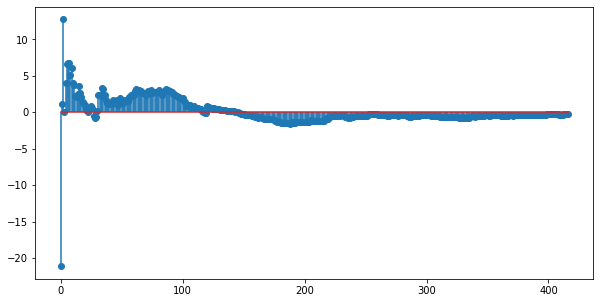

In [204]:
fig, ax = plt.subplots(figsize=(10,5))
ax.stem(w1, use_line_collection=True)

## Classification Task

In [158]:
dataset = load.load_svmlight_file('phishing.txt', n_features = 68)

start = 10
size_and_error = dict()
size_and_time = dict()

for N in np.arange(start, dataset[0].shape[0], 20).tolist():
    X = dataset[0][:N]
    y = dataset[1][:N]
    start = timer()
    reg = LogisticRegression(solver='saga').fit(X, y)
    size_and_error[N] = reg.score(X,y)
    end = timer() - start
    size_and_time[N] = end

In [159]:
x = list(size_and_error.keys())
y = [size_and_error[i] for i in x]
z = [size_and_time[i] for i in x]

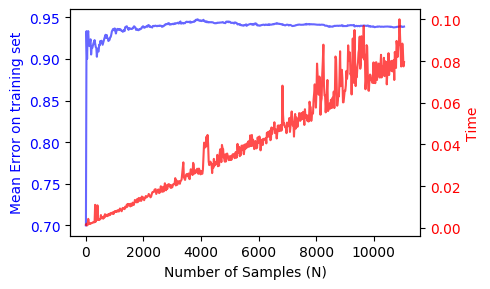

In [160]:
fig, ax1 = plt.subplots(figsize=(5,3), dpi=100)
color = 'blue'
ax1.set_xlabel('Number of Samples (N)')
ax1.set_ylabel('Mean Error on training set', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(x, y, color=color, alpha=0.6)

ax2 = ax1.twinx()

color = 'red'
ax2.set_ylabel('Time', color=color)
ax2.plot(x, z, color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()